In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv(r"C:\Users\thaku\Downloads\abalone_dataset.csv")

In [27]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
X = data.iloc[:, 1:-2]
y = data.iloc[:, -1]

In [31]:
X.shape

(4177, 6)

In [33]:
y.shape

(4177,)

In [35]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# DATA SET PREPROCESSING

## 1.Missing Values

In [39]:
data.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

## 2.outlier Handling

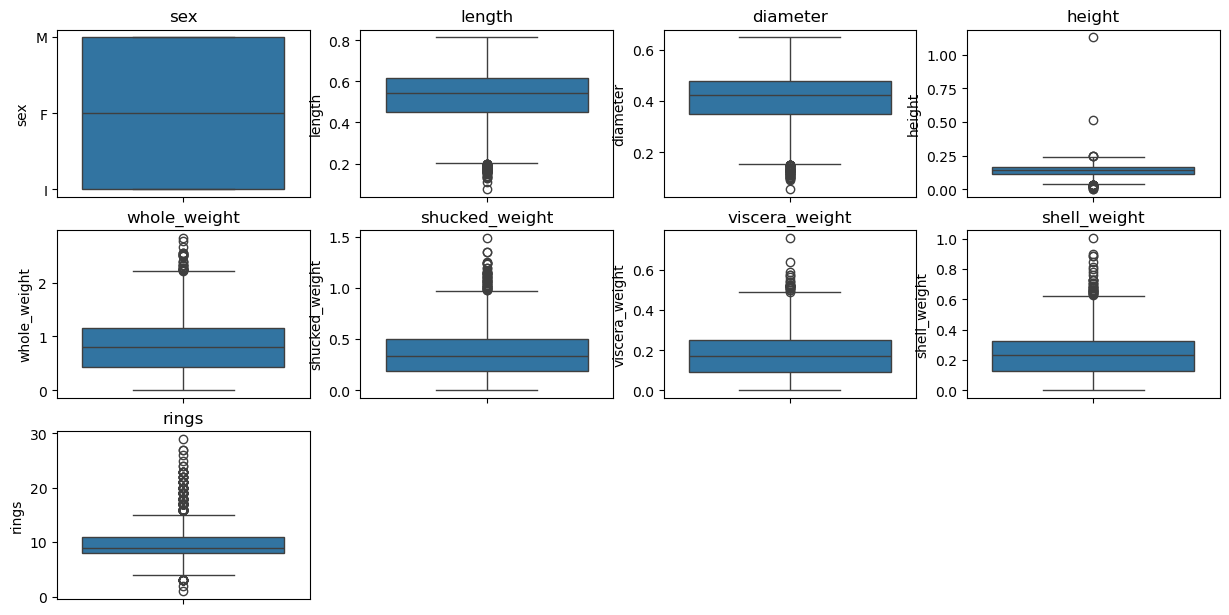

In [41]:
import seaborn as sns
plt.figure(figsize=(15,10))
for i, column in enumerate(data.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(data[column])
    plt.title(column)
plt.show()

In [43]:
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df = data[(data[column]>=lower_bound) & (data[column]<=upper_bound)]


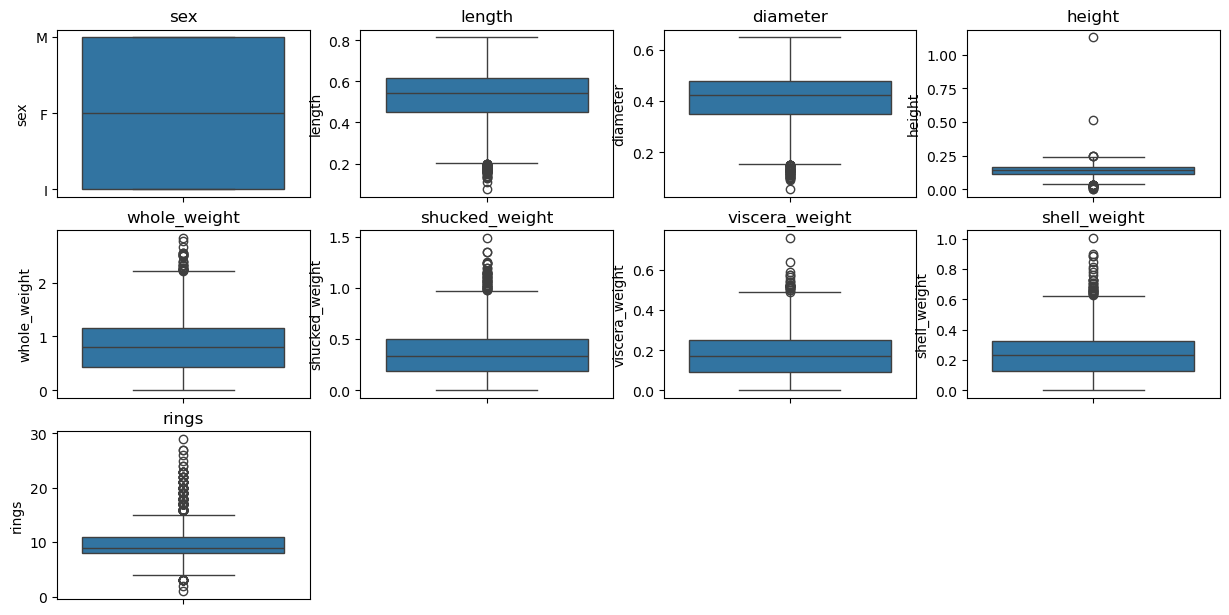

In [45]:
plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(data[column])
    plt.title(column)
plt.show()

## 3.Features engineering

In [47]:
X.shape

(4177, 6)

In [49]:
X.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395


In [51]:
X["X0"] = X["length"]/X["diameter"]

In [53]:
X.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,X0
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,1.246575
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,1.320755
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,1.261905
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,1.205479
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,1.294118


In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures(5)

In [59]:
X.shape

(4177, 7)

In [61]:
X_poly = poly.fit_transform(X)

In [63]:
X_poly.shape

(4177, 792)

In [65]:
feature_name = poly.get_feature_names_out(X.columns)

In [67]:
feature_name

array(['1', 'length', 'diameter', 'height', 'whole_weight',
       'shucked_weight', 'viscera_weight', 'X0', 'length^2',
       'length diameter', 'length height', 'length whole_weight',
       'length shucked_weight', 'length viscera_weight', 'length X0',
       'diameter^2', 'diameter height', 'diameter whole_weight',
       'diameter shucked_weight', 'diameter viscera_weight',
       'diameter X0', 'height^2', 'height whole_weight',
       'height shucked_weight', 'height viscera_weight', 'height X0',
       'whole_weight^2', 'whole_weight shucked_weight',
       'whole_weight viscera_weight', 'whole_weight X0',
       'shucked_weight^2', 'shucked_weight viscera_weight',
       'shucked_weight X0', 'viscera_weight^2', 'viscera_weight X0',
       'X0^2', 'length^3', 'length^2 diameter', 'length^2 height',
       'length^2 whole_weight', 'length^2 shucked_weight',
       'length^2 viscera_weight', 'length^2 X0', 'length diameter^2',
       'length diameter height', 'length diameter wh

In [69]:
poly.feature_names_in_

array(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'X0'], dtype=object)

In [71]:
X_poly

array([[1.        , 0.455     , 0.365     , ..., 0.01976052, 0.24389085,
        3.01018135],
       [1.        , 0.35      , 0.265     , ..., 0.00541938, 0.14758099,
        4.0189338 ],
       [1.        , 0.53      , 0.42      , ..., 0.04023394, 0.35880853,
        3.19987414],
       ...,
       [1.        , 0.6       , 0.475     , ..., 0.16658988, 0.73192809,
        3.21579388],
       [1.        , 0.625     , 0.485     , ..., 0.1457793 , 0.7197698 ,
        3.55378699],
       [1.        , 0.71      , 0.555     , ..., 0.29677414, 1.00838515,
        3.42631137]])

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [77]:
pred = model.predict(X)

In [79]:
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
score = r2_score(y, pred)
error = mean_squared_error(y, pred)

In [83]:
score

1.0

In [92]:
print(error)

0.0


In [93]:
model1 = DecisionTreeRegressor()
model1.fit(X_poly, y)

DecisionTreeRegressor()

In [96]:
pred1 = model1.predict(X_poly)

In [98]:
score1 = r2_score(y, pred1)

In [100]:
score1

1.0

# Feature Selection

In [102]:
X_poly.shape

(4177, 792)

In [104]:
X.shape

(4177, 7)

In [106]:
from sklearn.feature_selection import SelectKBest, f_regression

In [108]:
k = 30
selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_poly, y)

In [110]:
X_selected.shape

(4177, 30)

# feature Scaling

In [112]:
X_selected.min(axis=1)

array([0.01265637, 0.00632025, 0.023814  , ..., 0.04625312, 0.03528375,
       0.06006488])

In [114]:
X_selected.max(axis=1)

array([0.64073973, 0.35      , 0.85430952, ..., 1.48547368, 1.41043814,
       2.49267568])

# Standard MeanMaxScaler

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [118]:
scalar = MinMaxScaler()

In [120]:
X_selected_scaled = scalar.fit_transform(X_selected)

In [122]:
X_selected_scaled.min(axis=1)

array([0.07676068, 0.03844414, 0.11762479, ..., 0.1787928 , 0.13274336,
       0.17224177])

In [124]:
X_selected_scaled.max(axis=1)


array([0.5210084 , 0.37162162, 0.61486486, ..., 0.70945946, 0.74324324,
       0.85810811])

# Dataset Visualization

## Histogram Kernel Density Plot

In [126]:
X.head(3)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,X0
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,1.246575
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,1.320755
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,1.261905


<Axes: xlabel='length', ylabel='Count'>

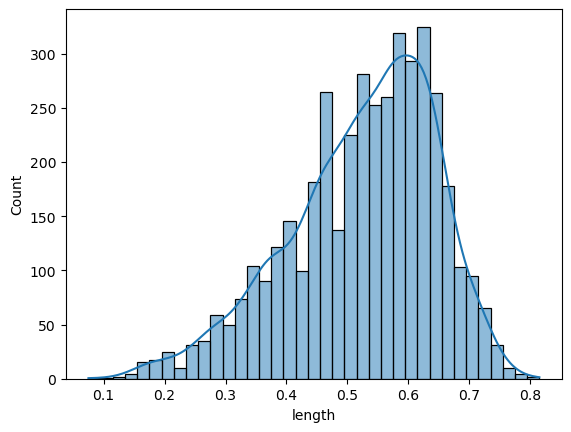

In [130]:
sns.histplot(data = X, x='length', kde=True)

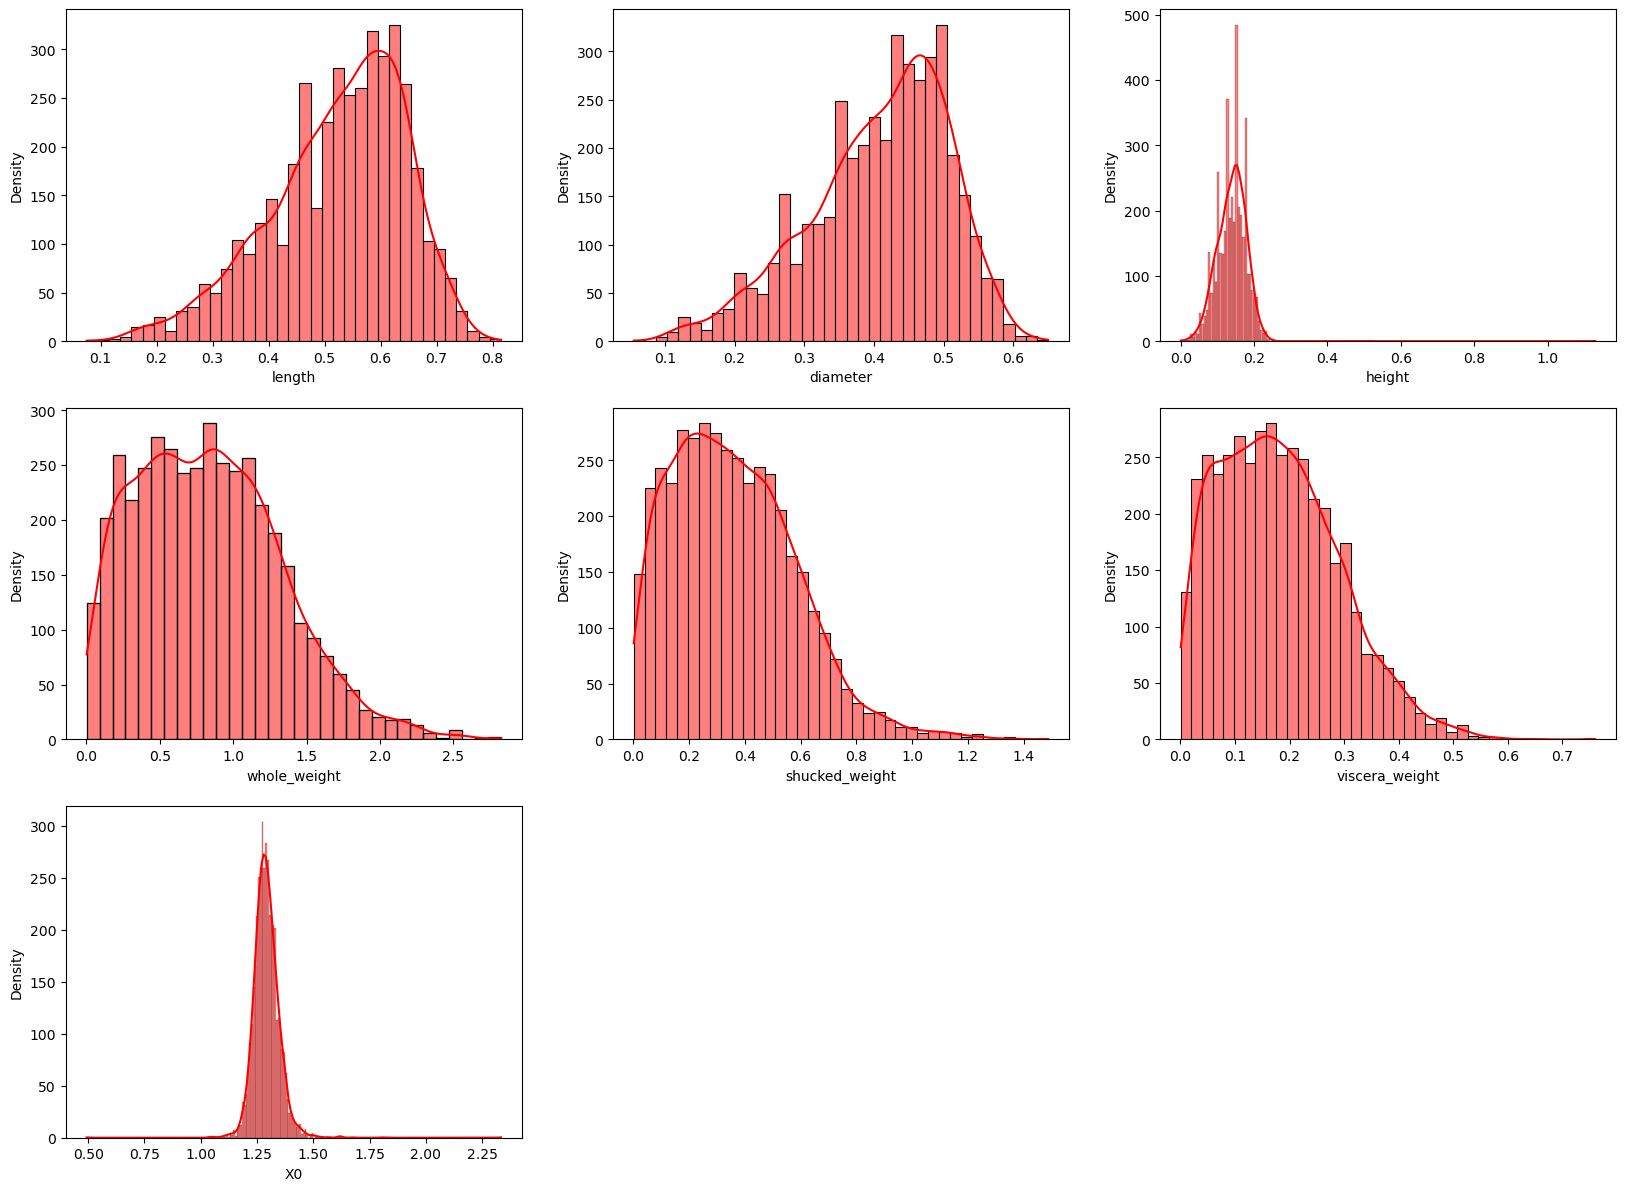

In [134]:
num_features = X.shape[1]
num_cols = 3
num_row = (num_features*2+num_cols-1)//num_cols
plt.figure(figsize=(20, num_row*5))
for i, feature in enumerate(X):
    plt.subplot(num_row, num_cols, i+1)
    sns.histplot(X[feature], color='red', kde=True)
    plt.xlabel(feature)
    plt.ylabel("Density")
plt.savefig("histogram.png", dpi=600)
plt.show()

# Pair PLot

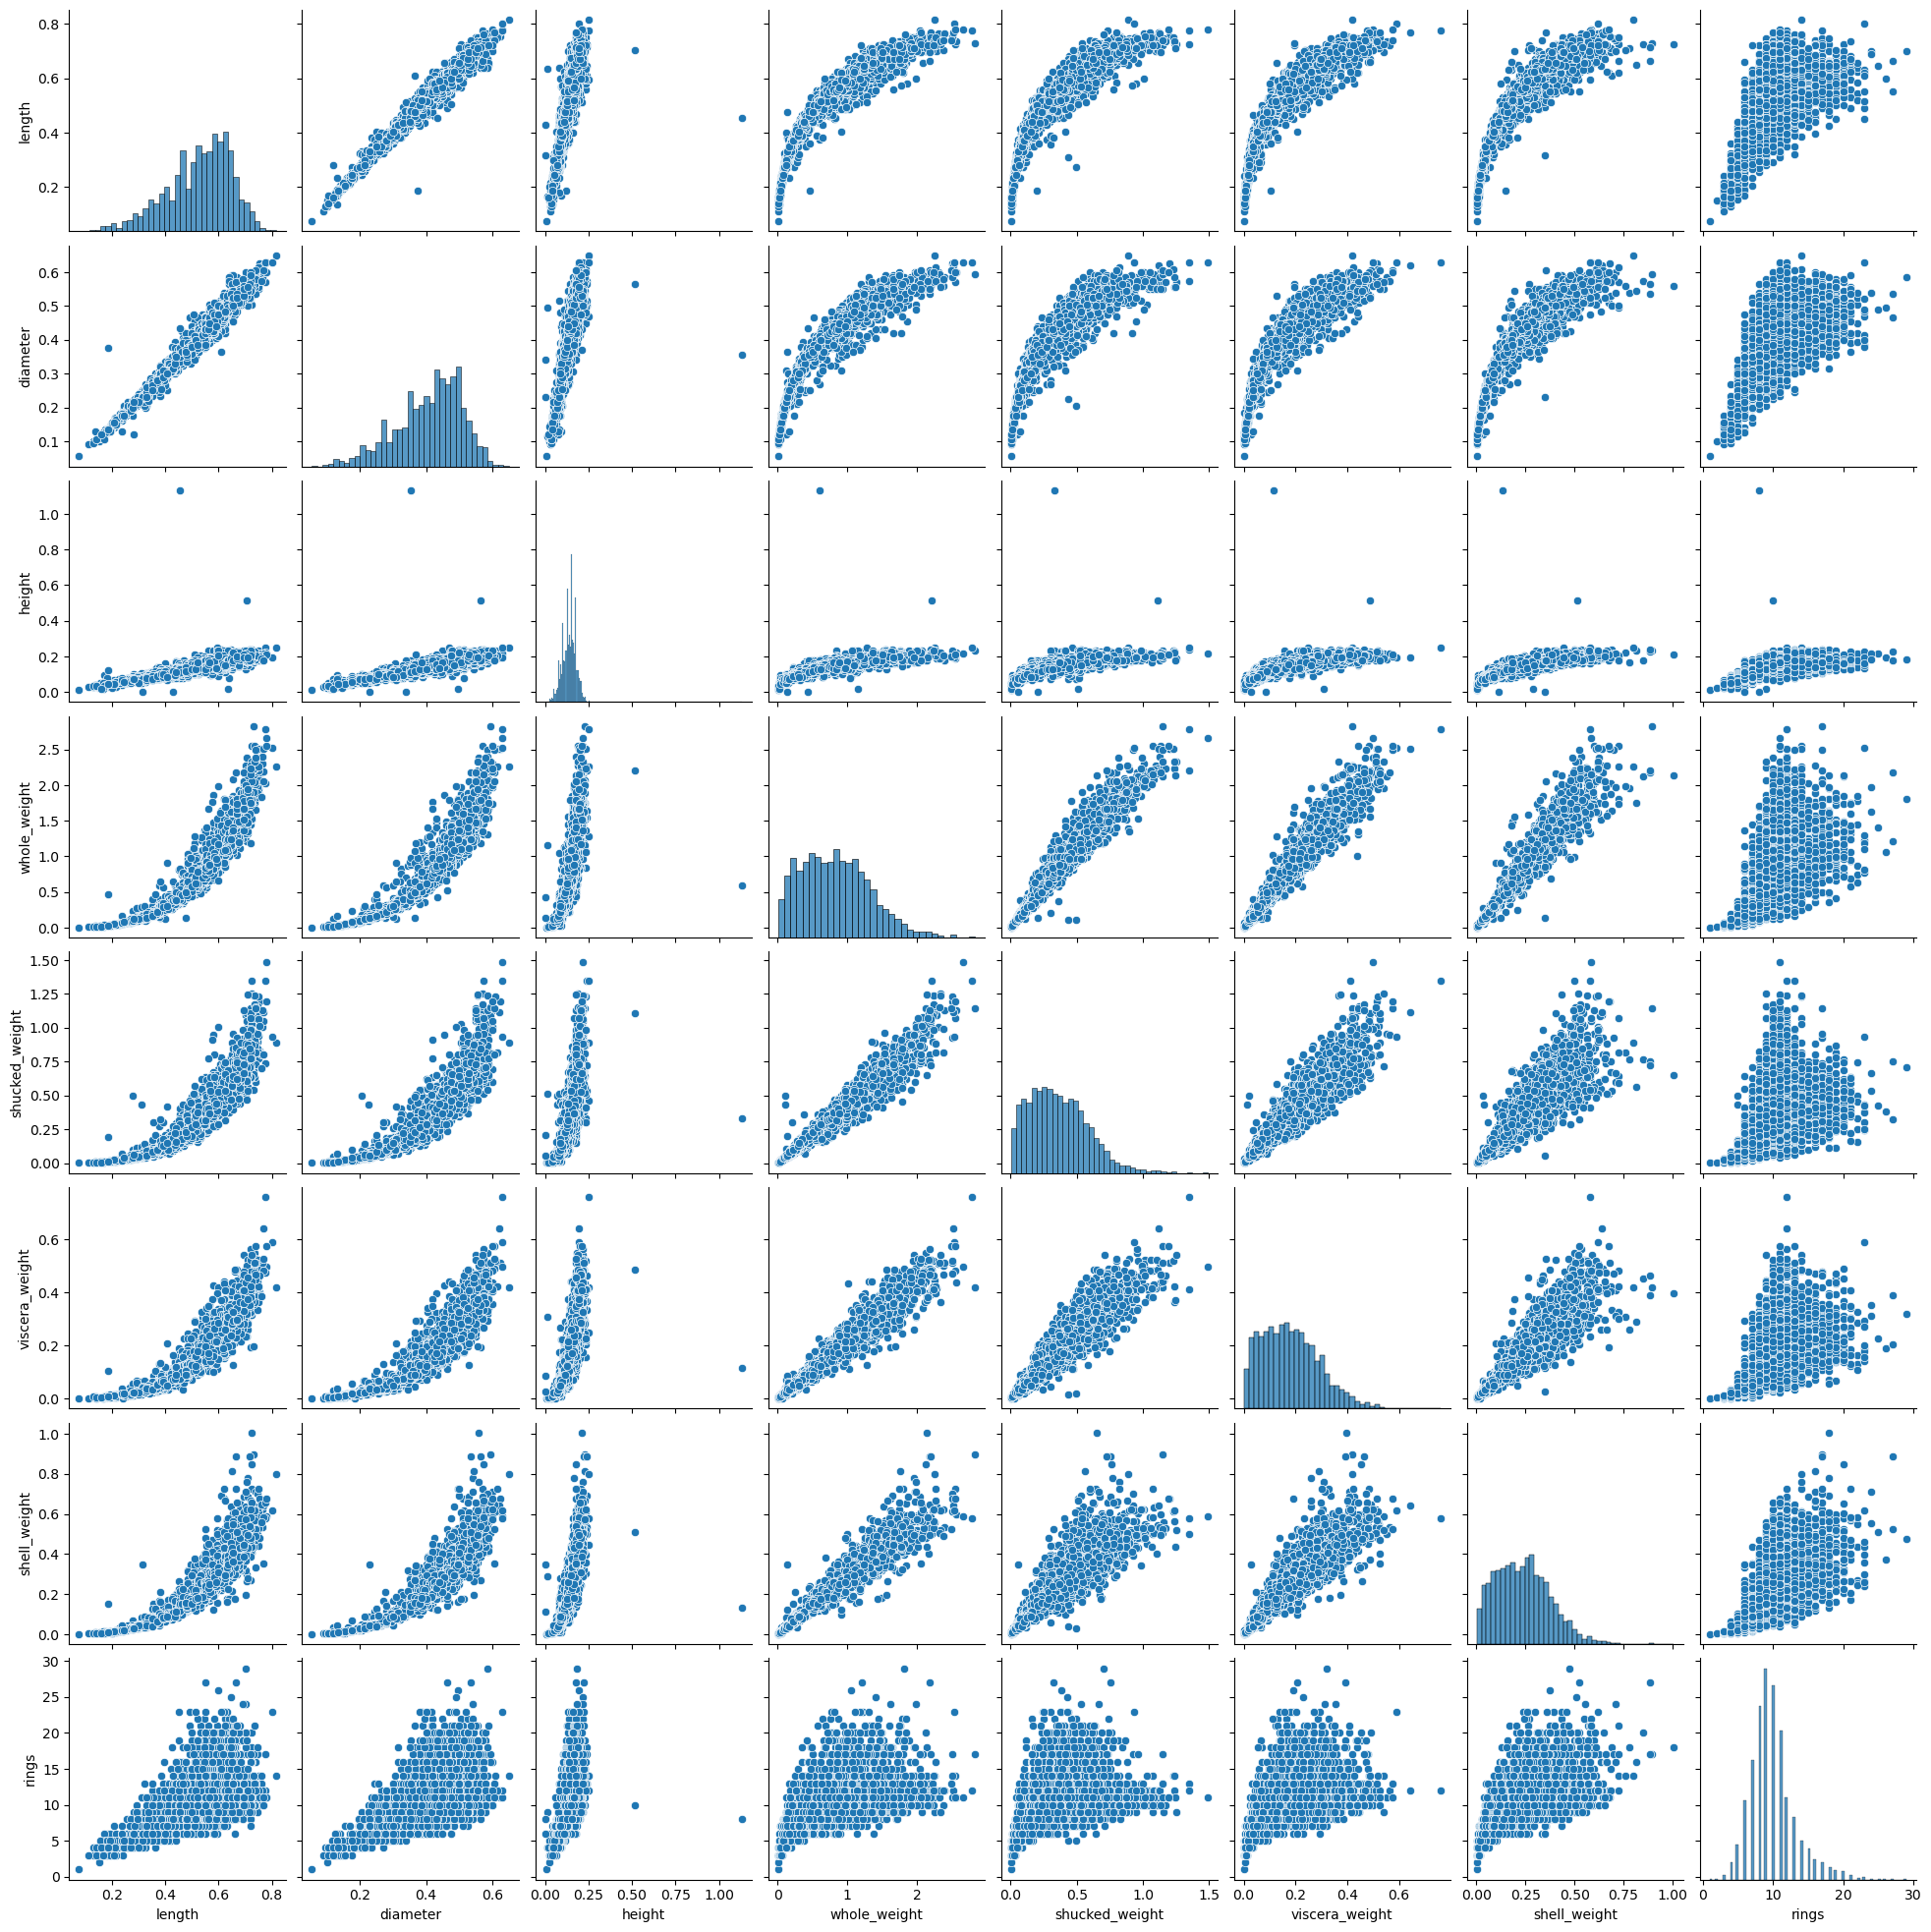

In [136]:
sns.pairplot(data)

# pearson >>> Linear Correlation

# spearson >>> Non-Linear Correlation

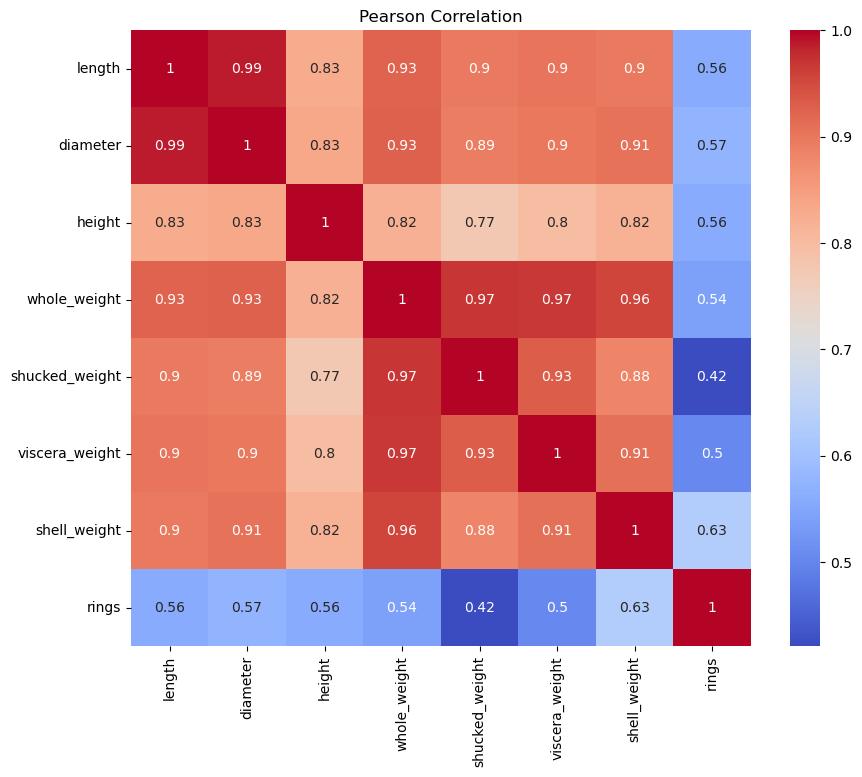

In [146]:
numeric_data = data.select_dtypes(include=[float, int])
corr_mat = corr_mat = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation")
plt.savefig("Pearson.png", dpi=900)

Text(0.5, 1.0, 'Spearman Correlation')

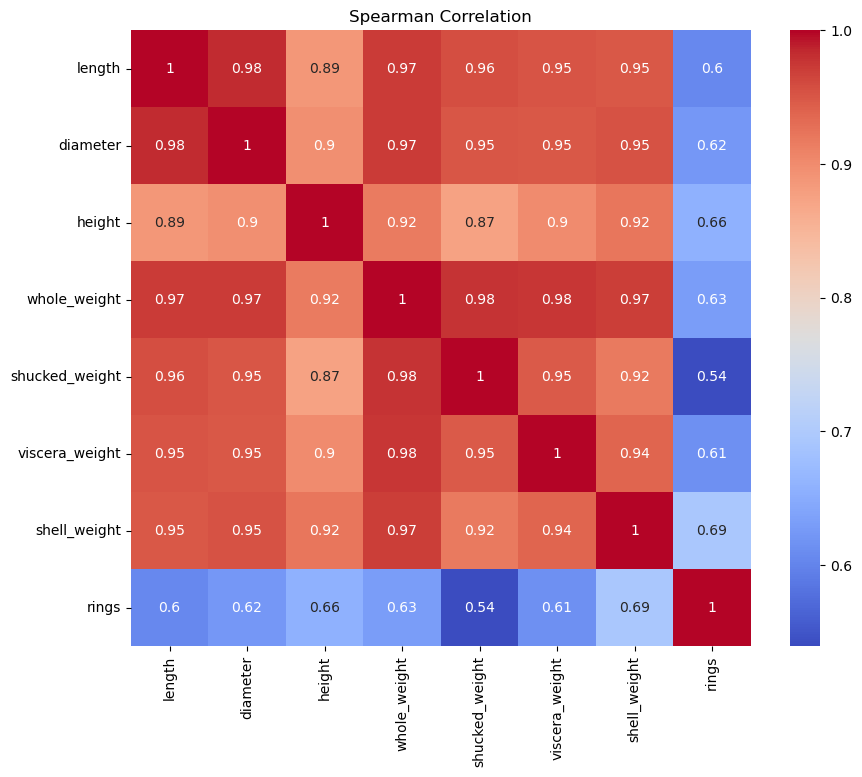

In [148]:
corr_mat = numeric_data.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation")

# Dimensionality Reduction

In [150]:
X_poly.shape

(4177, 792)

# PCA

In [152]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(30)
X_pca = pca.fit_transform(X_poly)

In [156]:
X_pca.shape

(4177, 30)

# Dataset Splitting

In [158]:
from sklearn.model_selection import train_test_split


In [162]:
data = pd.read_csv(r"C:\Users\thaku\Downloads\abalone_dataset.csv")
X = data.iloc[:, 1:-2]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [164]:
X.shape

(4177, 6)

In [166]:
X_train.shape

(3759, 6)

In [168]:
X_test.shape

(418, 6)

# Learning Curve

In [170]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor

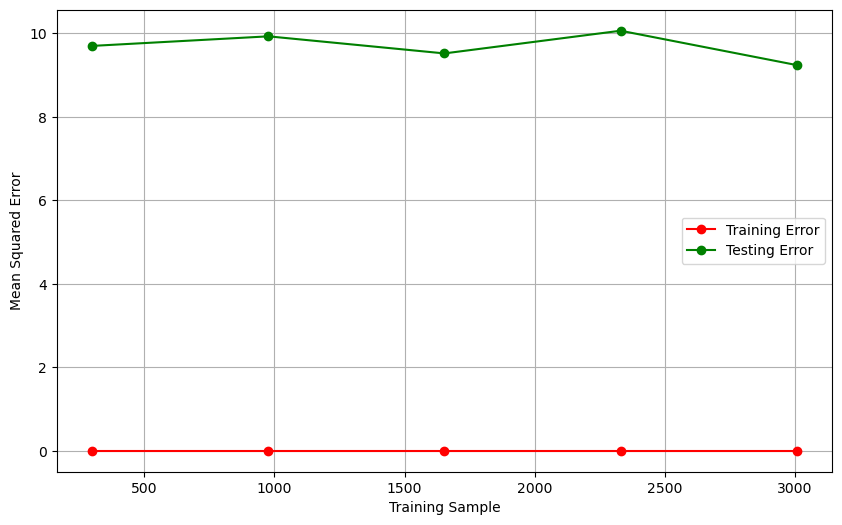

In [172]:
def plot_learning_curve(estimator, X_train, y_train, cv=None, train_sizes=np.linspace(0.1,1.0,5)):
    train_size, train_score, test_score = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_score_mean = -np.mean(train_score, axis=1)
    test_score_mean = -np.mean(test_score, axis=1)
    plt.figure(figsize=(10,6))
    plt.plot(train_size,train_score_mean, 'o-', color='red', label ='Training Error')
    plt.plot(train_size,test_score_mean, 'o-', color='green', label ='Testing Error')
    plt.xlabel("Training Sample")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

regressor = DecisionTreeRegressor()
plot_learning_curve(regressor, X_train, y_train, cv=5)


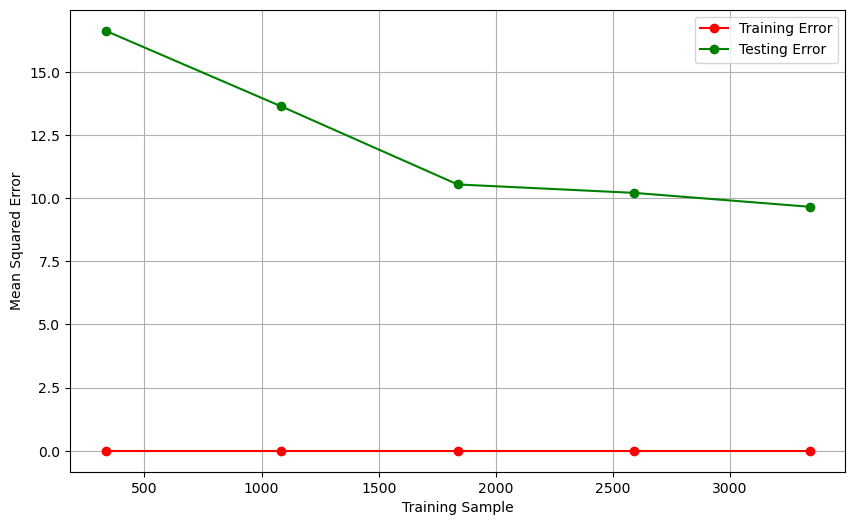

In [174]:
plot_learning_curve(regressor, X, y, cv=5)

# Model Training 

## Cross validation

In [176]:
data = pd.read_csv(r"C:\Users\thaku\Downloads\abalone_dataset.csv")
X = data.iloc[:, 1:-2].values
y = data.iloc[:, -1].values

In [178]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [180]:
model = DecisionTreeRegressor()

In [182]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [184]:
train_data = []
test_data = []
actual_pred = []
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    actual_pred.append({"Fold": fold, "Actual": y_test, "Prediction": test_pred})
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_data.append({"MSE": train_mse, "Score":train_score, "MAE":train_mae})
    test_data.append({"MSE": test_mse, "Score":test_score, "MAE":test_mae})
    fold+=1


In [186]:
train_data_df = pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)

In [188]:
train_data_df

,MSE,Score,MAE
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [190]:
test_data_df.mean()

MSE      9.647082
Score    0.060410
MAE      2.168998
dtype: float64

In [192]:
actual_pred_df = pd.DataFrame(actual_pred)

In [194]:
actual_pred_df

,Fold,Actual,Prediction
0,1,"[9, 10, 10, 9, 18, 19, 5, 7, 6, 13, 10, 9, 10,...","[10.0, 8.0, 6.0, 9.0, 13.0, 10.0, 3.0, 5.0, 6...."
1,2,"[20, 11, 11, 11, 10, 4, 7, 10, 8, 4, 7, 11, 9,...","[13.0, 7.0, 13.0, 8.0, 13.0, 6.0, 8.0, 8.0, 7...."
2,3,"[15, 16, 11, 15, 9, 8, 13, 9, 10, 10, 12, 8, 5...","[7.0, 14.0, 21.0, 18.0, 7.0, 7.0, 12.0, 10.0, ..."
3,4,"[12, 6, 7, 11, 13, 10, 7, 12, 9, 9, 7, 6, 8, 1...","[11.0, 6.0, 10.0, 12.0, 14.0, 12.0, 6.0, 9.0, ..."
4,5,"[7, 14, 9, 8, 20, 14, 12, 9, 11, 10, 9, 18, 3,...","[7.0, 10.0, 9.0, 8.0, 10.0, 10.0, 11.0, 6.0, 8..."
5,6,"[9, 10, 11, 10, 8, 9, 10, 8, 21, 12, 12, 19, 1...","[10.0, 9.0, 11.0, 6.0, 8.0, 14.0, 8.0, 16.0, 1..."
6,7,"[14, 12, 10, 15, 7, 12, 15, 8, 15, 10, 6, 18, ...","[11.0, 12.0, 18.0, 13.0, 7.0, 16.0, 9.0, 10.0,..."
7,8,"[10, 8, 19, 12, 9, 5, 7, 8, 7, 10, 12, 10, 13,...","[9.0, 7.0, 14.0, 11.0, 8.0, 5.0, 9.0, 9.0, 7.0..."
8,9,"[7, 10, 9, 8, 16, 11, 9, 8, 15, 14, 12, 15, 11...","[6.0, 8.0, 6.0, 9.0, 10.0, 9.0, 9.0, 9.0, 8.0,..."
9,10,"[7, 7, 13, 8, 14, 7, 10, 14, 17, 10, 13, 13, 1...","[6.0, 7.0, 11.0, 9.0, 14.0, 8.0, 6.0, 8.0, 20...."


Text(0, 0.5, 'Predictions')

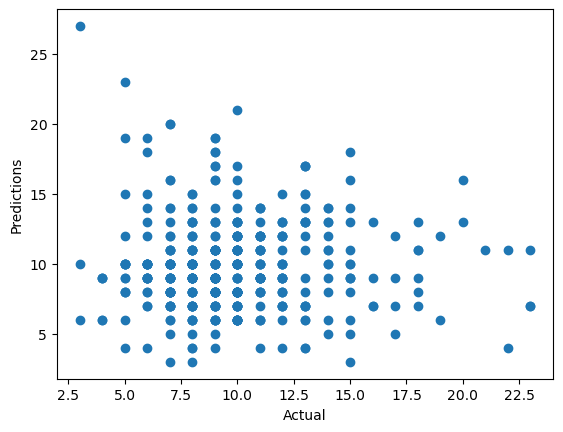

In [196]:
plt.scatter(actual_pred_df.iloc[0,1], actual_pred_df.iloc[1,2])
plt.xlabel("Actual")
plt.ylabel("Predictions")

In [198]:
actual_pred_df.iloc[0,1].shape

(418,)

In [200]:
actual_pred_df.iloc[1,2].shape

(418,)

# Features importance analysis

In [203]:
importances = model.feature_importances_

In [205]:
importances_sorted = np.argsort(importances)[::-1]

In [207]:
importances_sorted

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [209]:
importances

array([0.07309266, 0.10422404, 0.35775588, 0.18641538, 0.18363415,
       0.0948779 ])

([<matplotlib.axis.XTick at 0x1b0b8f5a330>,
 [Text(0, 0, 'height'),
  Text(1, 0, 'whole_weight'),
  Text(2, 0, 'shucked_weight'),
  Text(3, 0, 'diameter'),
  Text(4, 0, 'viscera_weight'),
  Text(5, 0, 'length')])

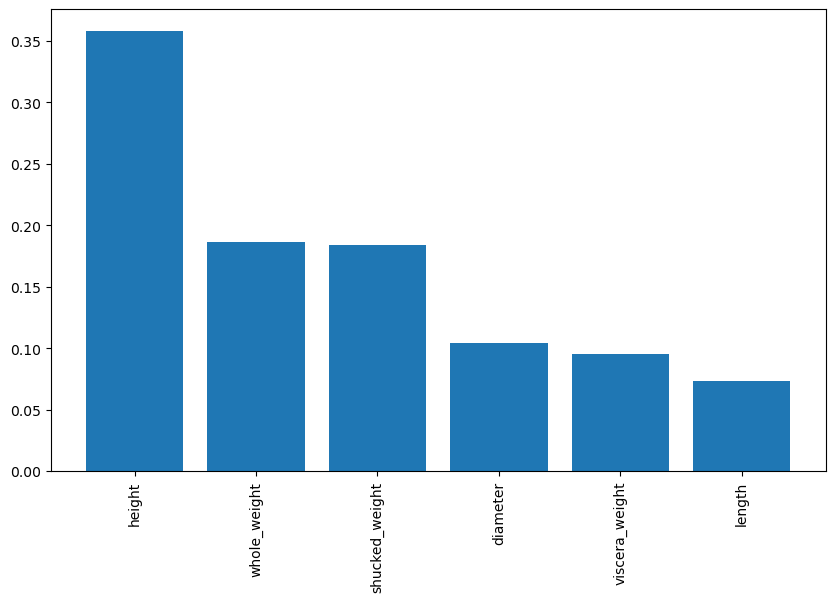

In [215]:
data = pd.read_csv(r"C:\Users\thaku\Downloads\abalone_dataset.csv")
X = data.iloc[:, 1:-2]
plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), height=importances[importances_sorted])
plt.xticks(range(X.shape[1]), X.columns[importances_sorted], rotation=90)

In [217]:
!pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
    --------------------------------------- 10.2/456.2 kB ? eta -:--:--
   - ------------------------------------- 20.5/456.2 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 30.7/456.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/456.2 kB 363.1 kB/s eta 0:00:02
   ------- ------------------------------- 81.9/456.2 kB 353.1 kB/s eta 0:00:02
   -------- ----------------------------- 102.4/456.2 kB 393.8 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.2 kB 385.0 kB/s eta 0:00:01
   ------------ ------------------------- 153.6/456.2 kB 437.1 kB/s eta 0:00:01
   ------------- ------------------------ 163.8/456.2 kB 427.9 kB/s eta 0:00:01
   ---------------- --------------------- 194.6/456.2 kB 471.4 kB/s eta 0:00:01
   ----------------- -------------------- 215.0/456.2 kB 468.6 kB/s eta 0:00:01
   ------------------- ------------------ 235.5/456.2 kB 

In [218]:
import shap

In [221]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

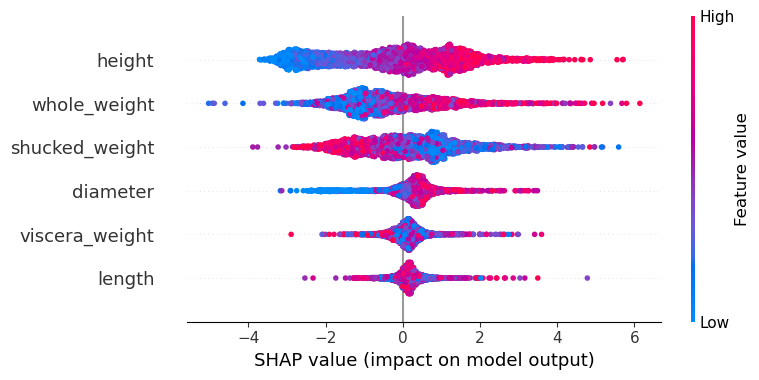

In [223]:
shap.summary_plot(shap_values, X, feature_names=X.columns)

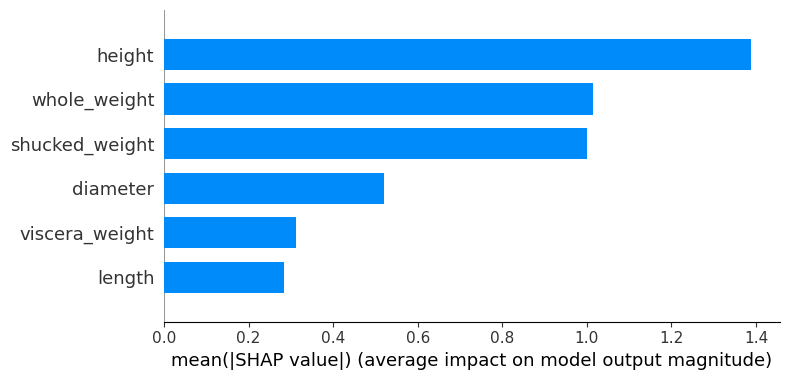

In [225]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=X.columns)